### Imports and Read-Ins

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

### Quick glance at my data

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_train.shape

(2051, 81)

In [5]:
df_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [6]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
df_test.shape

(878, 80)

In [8]:
df_test.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

## PART 1: Basic Cleaning

In [9]:
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')

In [10]:
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

In [11]:
df_train.isna().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

In [95]:
list(df_train.columns)

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_are

In [12]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Got it from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

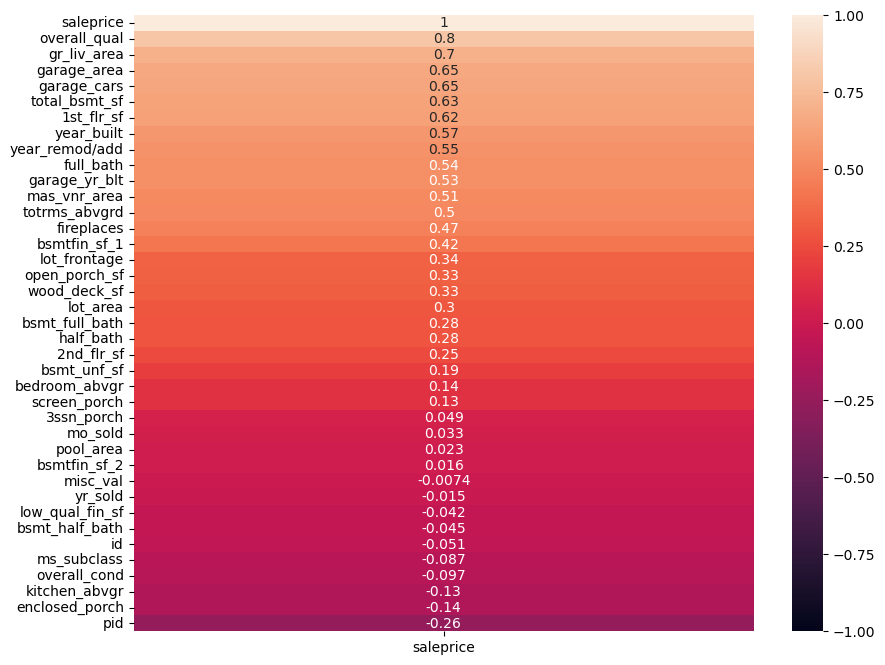

In [13]:
plt.figure(figsize= (10,8))
sns.heatmap(df_train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot=True,
           vmin=-1,
           vmax=1);

### Creating my model based on overall_qual and gr_liv_area

In [14]:
# Set up my X and y
X = df_train[['overall_qual', 'gr_liv_area']]
y = df_train['saleprice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

### Evaluating my model

In [18]:
#Train score
lr.score(X_train, y_train)

0.7194163570829553

In [19]:
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

0.7108316477991973

In [20]:
#test score
lr.score(X_test, y_test)

0.7530182162122661

### If my model is good, let's fit it on all data of train.csv

In [21]:
# refit on all data in train.csv
lr.fit(X, y)

LinearRegression()

### Make sale predictions for homes in test.csv

In [22]:
preds = lr.predict(df_test[['overall_qual', 'gr_liv_area']])
preds.shape

(878,)

### Create saleprice column in df_test

In [23]:
df_test['saleprice'] = preds

In [24]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,202108.236584
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,171155.152948
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,210730.038588
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,114389.375977
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,171764.968413


### Create data frame with only id and saleprice

In [25]:
lr_submission = df_test[['id', 'saleprice']]

In [26]:
lr_submission.head()

,id,saleprice
0,2658,202108.236584
1,2718,171155.152948
2,2414,210730.038588
3,1989,114389.375977
4,625,171764.968413


### Set index to id

In [27]:
lr_submission.set_index('id', inplace=True)

In [28]:
lr_submission.head()

,saleprice
id,
2658,202108.236584
2718,171155.152948
2414,210730.038588
1989,114389.375977
625,171764.968413


### Save submission

In [29]:
lr_submission.to_csv('submission/first_submission.csv')

### Adding another variable (garage_area) to the last one

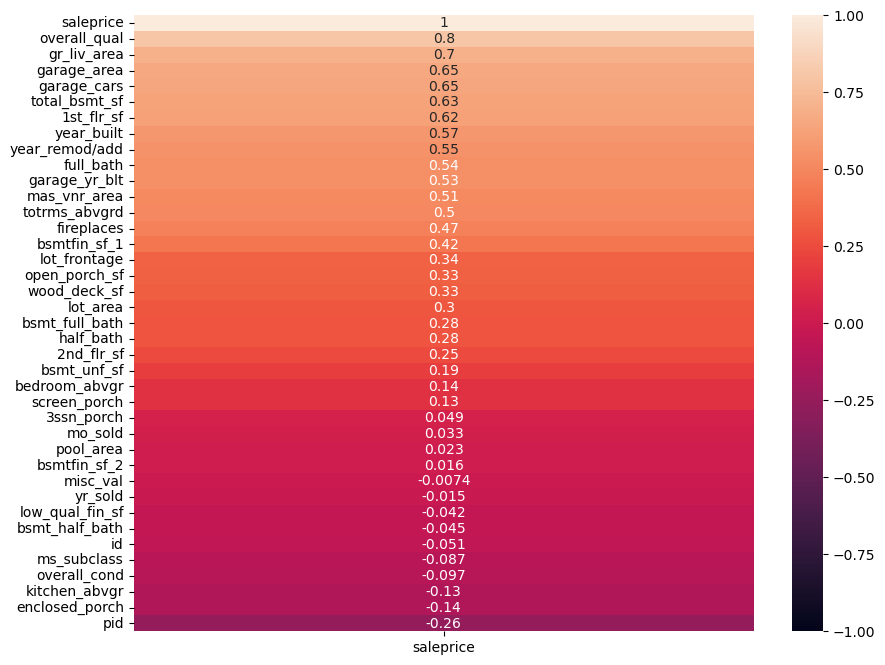

In [30]:
plt.figure(figsize= (10,8))
sns.heatmap(df_train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot=True,
           vmin=-1,
           vmax=1);

In [31]:
df_train['garage_area'].isna().sum()

1

In [32]:
df_train.dropna(subset=['garage_area'], inplace=True)

In [33]:
X = df_train[['overall_qual', 'gr_liv_area', 'garage_area']]
y = df_train['saleprice']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
lr.score(X_train, y_train)

0.7444722695065337

In [37]:
lr.score(X_test, y_test)

0.795553500204591

In [38]:
lr.fit(X, y)

LinearRegression()

In [39]:
preds = lr.predict(df_test[['overall_qual', 'gr_liv_area', 'garage_area']])

In [40]:
df_test['saleprice'] = preds

In [41]:
lr_submission = df_test[['id', 'saleprice']]

In [42]:
lr_submission.set_index('id', inplace=True)

In [43]:
lr_submission.head()

,saleprice
id,
2658,196334.379773
2718,181164.846057
2414,202516.216681
1989,125073.449126
625,176433.117896


In [44]:
lr_submission.to_csv('submission/second_submission.csv')

### Adding another variable (garage_cars) to the last one

In [45]:
df_train['garage_cars'].isna().sum()

0

In [46]:
df_train['garage_cars'].astype(int)

0       2
1       2
2       1
3       2
4       2
       ..
2046    2
2047    2
2048    2
2049    1
2050    2
Name: garage_cars, Length: 2050, dtype: int32

In [47]:
X = df_train[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars']]
y = df_train['saleprice']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
lr.score(X_train, y_train)

0.7457895653015225

In [51]:
lr.score(X_test, y_test)

0.7931272400610008

In [52]:
lr.fit(X, y)

LinearRegression()

In [53]:
preds = lr.predict(df_test[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars']])
df_test['saleprice'] = preds
lr_submission = df_test[['id', 'saleprice']]
lr_submission.set_index('id', inplace=True)
lr_submission.head()

,saleprice
id,
2658,192503.029249
2718,180994.064489
2414,204235.132185
1989,126691.739738
625,177085.090088


In [54]:
lr_submission.to_csv('submission/third_submission.csv')

### Making a new dataframe based on more valuabale columns

In [55]:
df_new_train = df_train.select_dtypes(include=[int, float]).drop(columns=['lot_frontage', 'mas_vnr_area', 'garage_yr_blt', '3ssn_porch', 'mo_sold', 'pool_area', 'bsmtfin_sf_2', 'misc_val', 'yr_sold', 'low_qual_fin_sf', 'bsmt_half_bath', 'id', 'ms_subclass', 'overall_cond', 'pid'], axis=1)

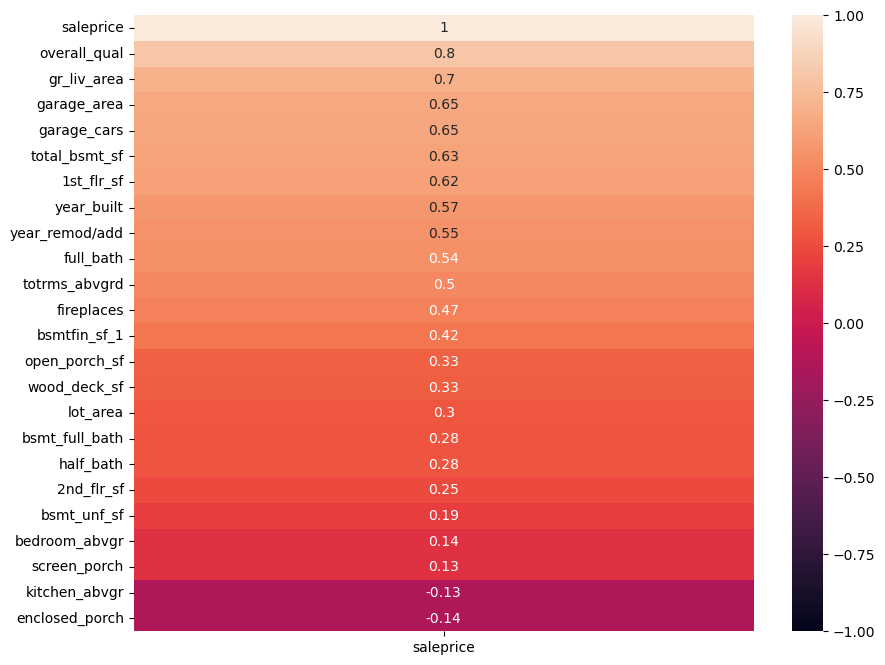

In [56]:
plt.figure(figsize= (10,8))
sns.heatmap(df_new_train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot=True,
           vmin=-1,
           vmax=1);

In [57]:
df_new_train.shape

(2050, 24)

In [58]:
df_new_train.isnull().sum()

lot_area          0
overall_qual      0
year_built        0
year_remod/add    0
bsmtfin_sf_1      1
bsmt_unf_sf       1
total_bsmt_sf     1
1st_flr_sf        0
2nd_flr_sf        0
gr_liv_area       0
bsmt_full_bath    2
full_bath         0
half_bath         0
bedroom_abvgr     0
kitchen_abvgr     0
totrms_abvgrd     0
fireplaces        0
garage_cars       0
garage_area       0
wood_deck_sf      0
open_porch_sf     0
enclosed_porch    0
screen_porch      0
saleprice         0
dtype: int64

In [59]:
df_new_train.dropna(inplace=True)

In [60]:
df_new_train.shape

(2048, 24)

In [61]:
X = df_new_train.drop(columns=['saleprice'], axis=1)
y = df_new_train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
X.columns

Index(['lot_area', 'overall_qual', 'year_built', 'year_remod/add',
       'bsmtfin_sf_1', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', 'screen_porch'],
      dtype='object')

In [63]:
lr.score(X_train, y_train)

0.8037360723139216

In [64]:
lr.score(X_test, y_test)

0.8551580334370983

In [65]:
lr.fit(X, y)

LinearRegression()

In [66]:
preds = lr.predict(df_test[['lot_area', 'overall_qual', 'year_built', 'year_remod/add',
       'bsmtfin_sf_1', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', 'screen_porch']])
df_test['saleprice'] = preds
lr_submission = df_test[['id', 'saleprice']]
lr_submission.set_index('id', inplace=True)
lr_submission.head()

,saleprice
id,
2658,135202.907275
2718,166633.612139
2414,217721.920010
1989,120502.081366
625,196057.964440


In [67]:
lr_submission.to_csv('submission/fourth_submission.csv')

# Transforming

In [68]:
df_new_train.head()

,lot_area,overall_qual,year_built,year_remod/add,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,...,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,saleprice
0,13517,6,1976,2005,533.0,192.0,725.0,725,754,1479,...,1,6,0,2.0,475.0,0,44,0,0,130500
1,11492,7,1996,1997,637.0,276.0,913.0,913,1209,2122,...,1,8,1,2.0,559.0,0,74,0,0,220000
2,7922,5,1953,2007,731.0,326.0,1057.0,1057,0,1057,...,1,5,0,1.0,246.0,0,52,0,0,109000
3,9802,5,2006,2007,0.0,384.0,384.0,744,700,1444,...,1,7,0,2.0,400.0,100,0,0,0,174000
4,14235,6,1900,1993,0.0,676.0,676.0,831,614,1445,...,1,6,0,2.0,484.0,0,59,0,0,138500


In [69]:
X = df_new_train.drop(columns=['saleprice'], axis=1)
y = df_new_train['saleprice']

In [70]:
# Instantiate PolynomialFeatures object to create all two-way terms
poly = PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)

# Fitting and transforming my X data
X_overfit = poly.fit_transform(X)
X_overfit.shape

(2048, 299)

In [71]:
# Creating train/test split
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, random_state=42)

In [72]:
X_train.shape

(1536, 299)

In [73]:
# Scaling data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

In [74]:
Z_train.shape

(1536, 299)

In [75]:
Z_test.shape

(512, 299)

In [76]:
ols = LinearRegression()
ols.fit(Z_train, y_train)
ols.score(Z_train, y_train)

0.9397708341024505

In [77]:
ols.score(Z_test, y_test)

-631.7709185490983

In [78]:
# Set up Lasso and fitting into my training data
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(Z_train, y_train)

C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904756123.4226074, tolerance: 794910830.293854
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854278996.6691895, tolerance: 794910830.293854
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803052961.1889648, tolerance: 794910830.293854
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sarvin.farhad\anaconda3\lib\site-packages\sklearn\linear_model\_

LassoCV(cv=5)

In [79]:
lasso_cv.score(Z_train, y_train)

0.9245500805492428

In [80]:
lasso_cv.score(Z_test, y_test)

0.8980889911464891

In [85]:
len(X.columns)

23

In [86]:
len(lasso_cv.coef_)

299

In [92]:
coef_df = pd.DataFrame({'features': poly.get_feature_names(X.columns), 'coefs': lasso_cv.coef_})

In [94]:
coef_df.sort_values('coefs', ascending = False).head()

,features,coefs
51,overall_qual total_bsmt_sf,28406.805935
49,overall_qual bsmtfin_sf_1,21798.787045
52,overall_qual 1st_flr_sf,18166.315328
54,overall_qual gr_liv_area,17591.143925
25,lot_area year_built,17143.065054
